# Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [17]:
df= pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Cleaning, Information & Visualization

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [21]:
df.shape

(4424, 35)

In [22]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [23]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [24]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [25]:
df['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

Text(0.5, 1.0, 'Target')

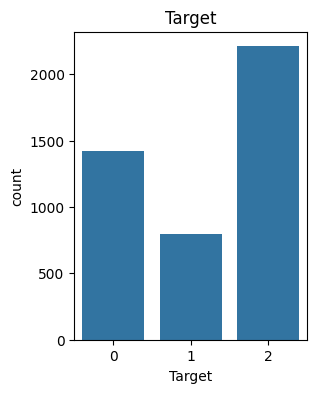

In [26]:
plt.figure(figsize=(3,4))
sns.countplot(data=df, x="Target").set_title('Target')

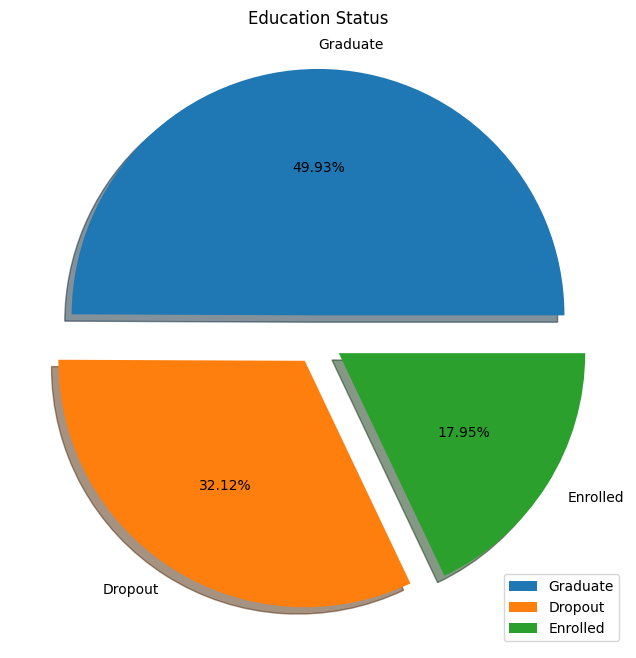

In [27]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.1), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

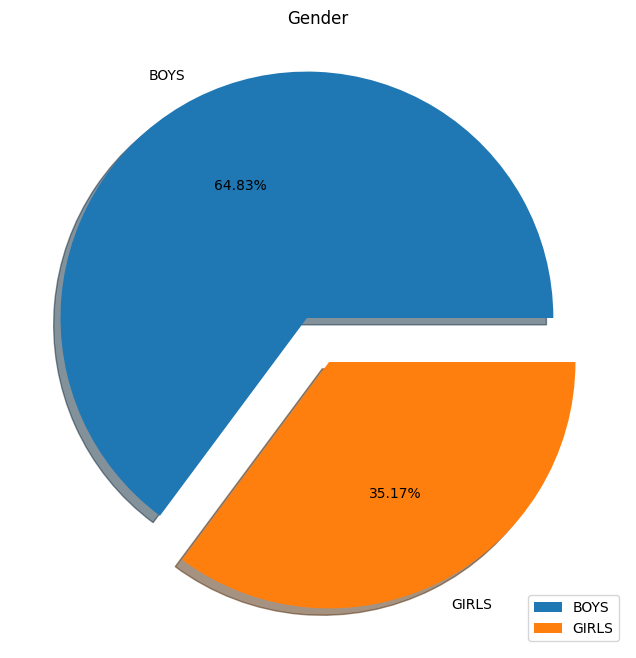

In [28]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['BOYS', 'GIRLS'], explode = (0.1, 0.1), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

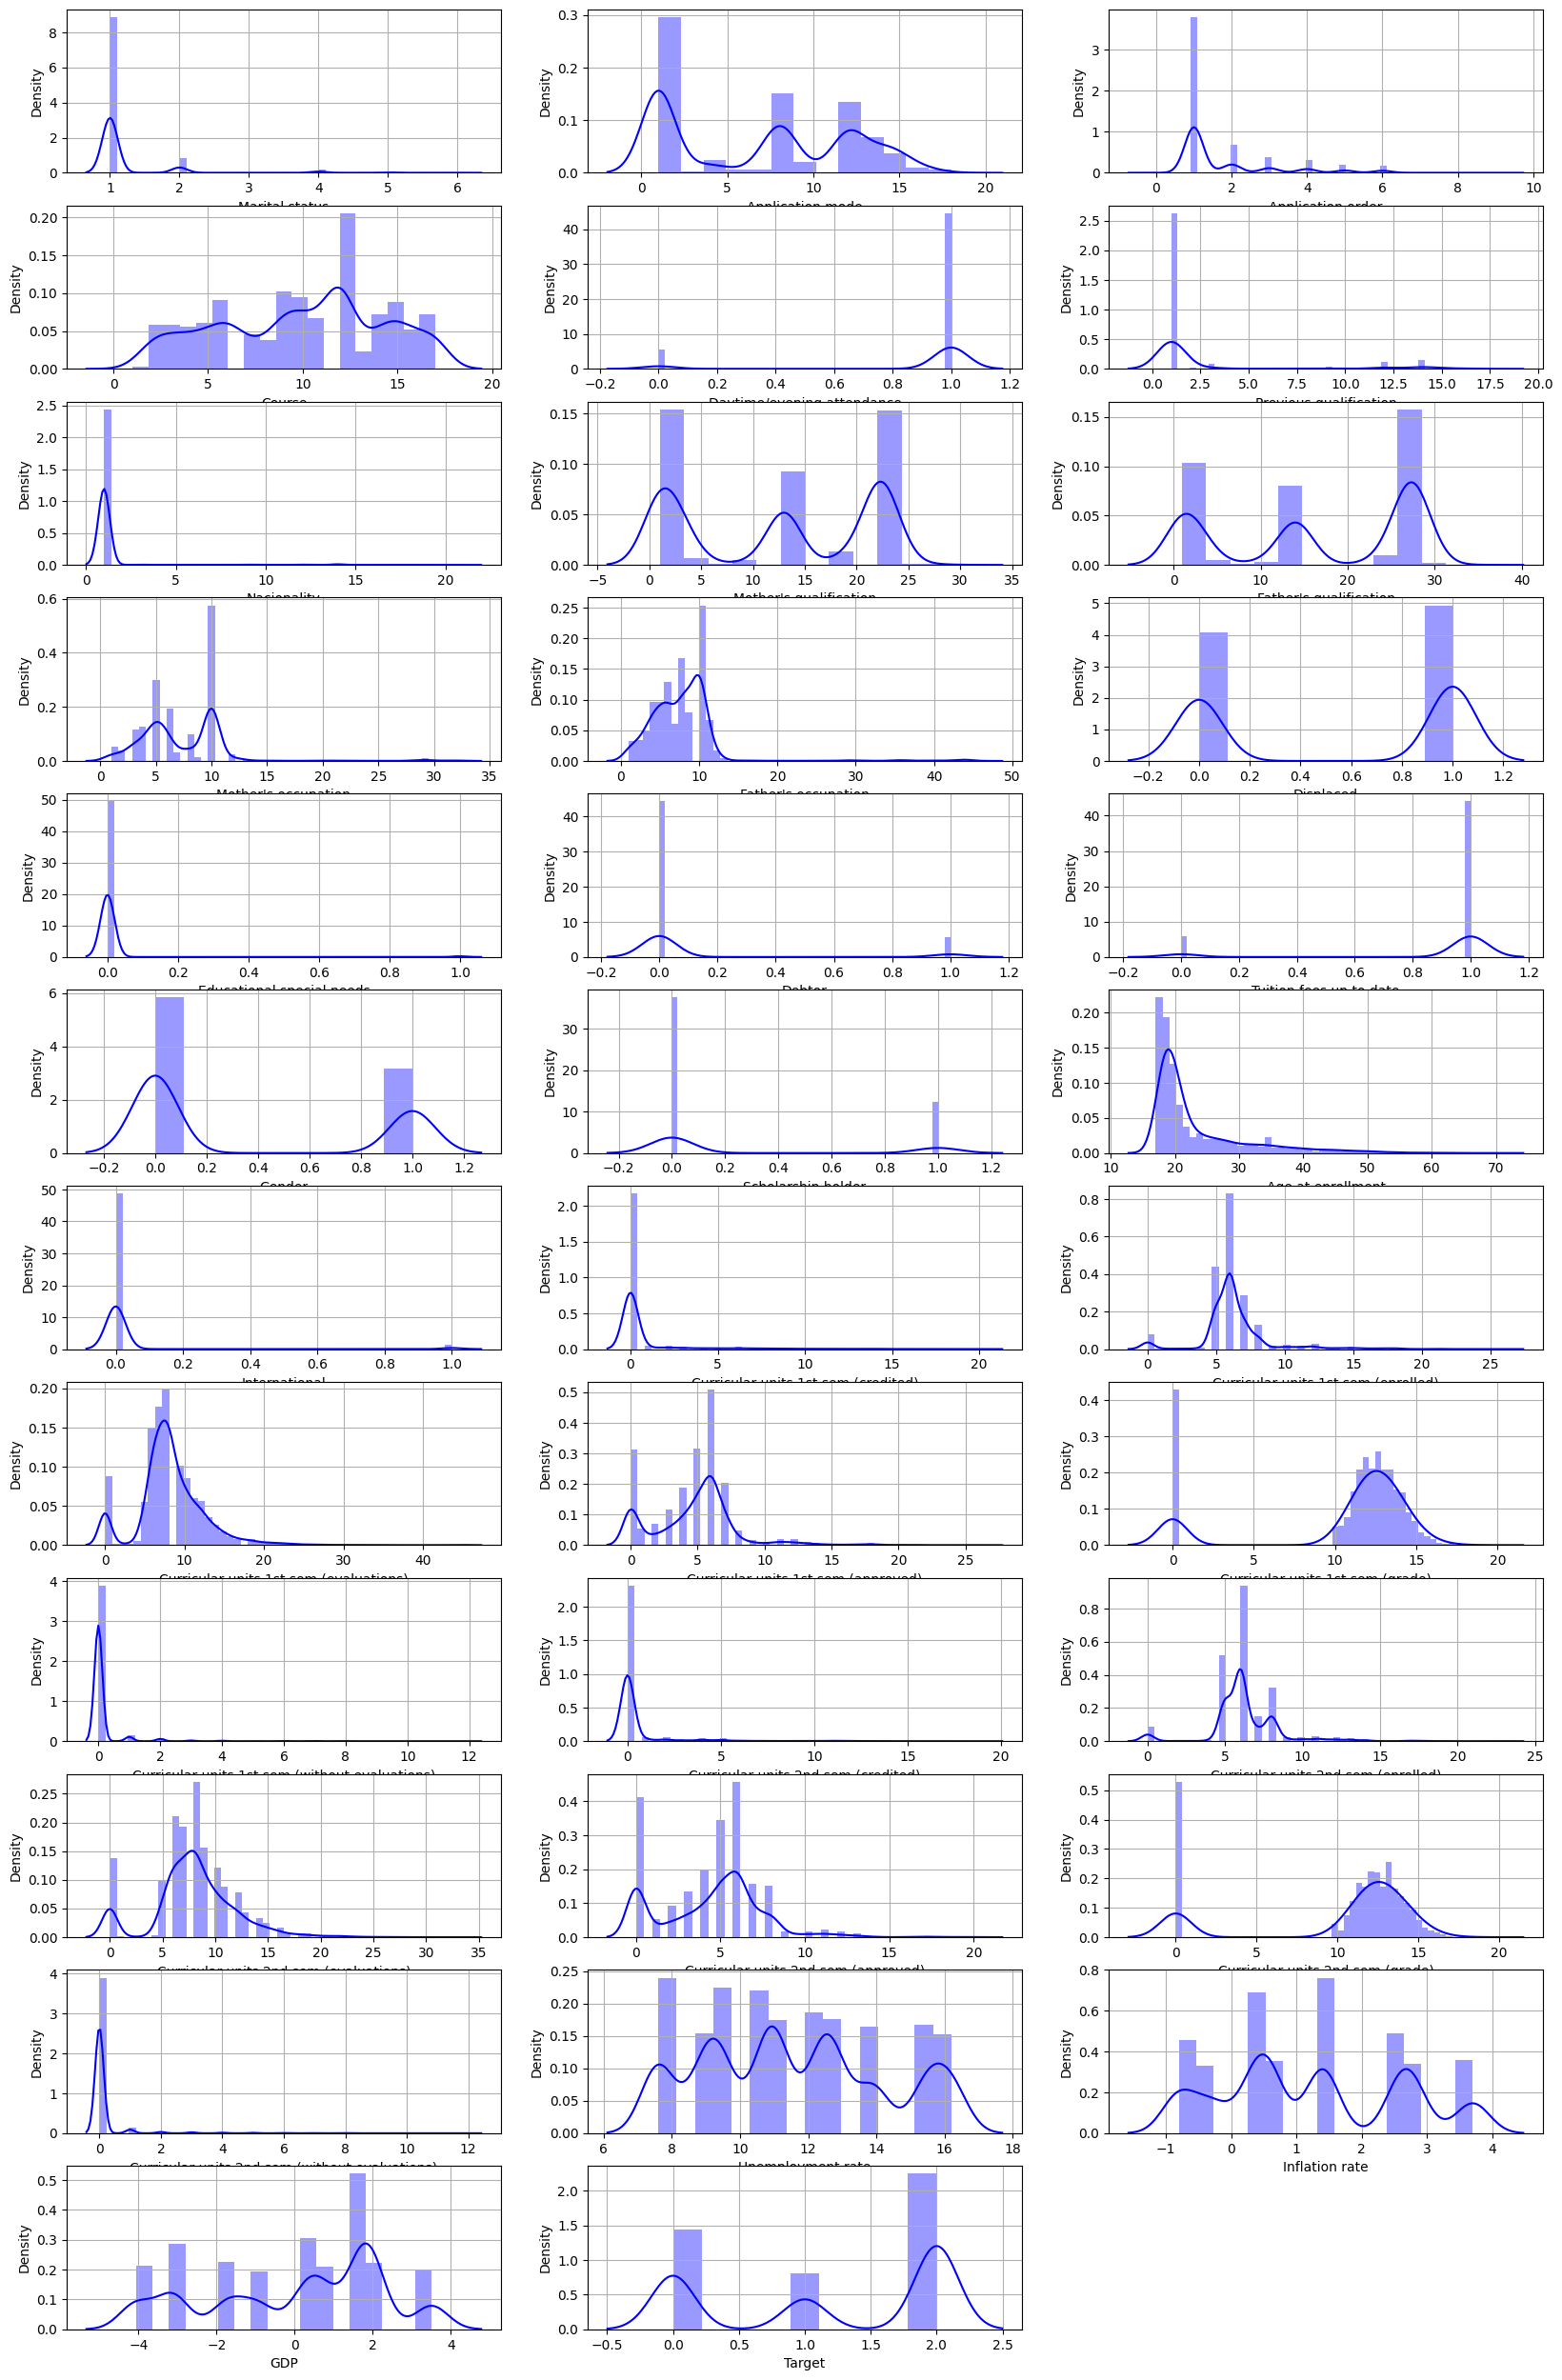

In [29]:
# Show the distribution of each feature

plt.figure(figsize=(20, 45))

for i in range(0, 35):
    plt.subplot(17,3,i+1)
    sns.distplot(df.iloc[:, i], color='blue')
    plt.grid()


## **Assertion**

### As we are predicting whether a student will dropout or not so, the number of "Enrolled" student is irrelevant. We only need to know whether a student graduated or dropedout. So, we are dropping the "Enrolled" values and going forward with "Graduate" & "Dropout" values.

In [30]:
df.drop(df[df['Target'] == 1].index, inplace = True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [31]:
df['Target'].unique()

array([0, 2])

In [32]:
df['Dropout'] = df['Target'].apply(lambda x: 1 if x==0 else 0)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,0
4420,1,1,2,15,1,1,19,1,1,10,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,1
4421,1,1,1,12,1,1,1,22,27,10,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,1
4422,1,1,1,9,1,1,1,22,27,8,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,0


In [33]:
df['Target'].value_counts()

Target
2    2209
0    1421
Name: count, dtype: int64

In [34]:
df['Dropout'].value_counts()

Dropout
0    2209
1    1421
Name: count, dtype: int64

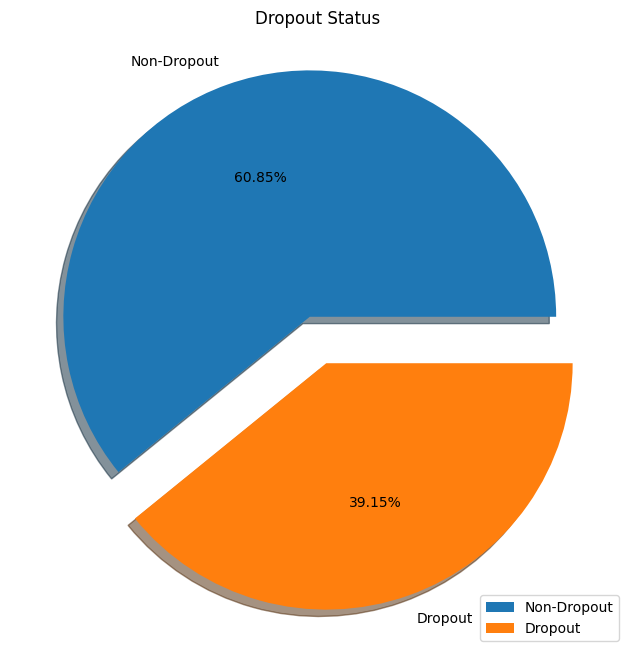

In [35]:
plt.figure(figsize=(8, 8))
plt.title("Dropout Status")
plt.pie(df['Dropout'].value_counts(),  labels = ['Non-Dropout', 'Dropout'], explode = (0.1, 0.1), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

# Standard Scaling the Data

In [36]:
x = df.iloc[:, :34].values
x = StandardScaler().fit_transform(x)


In [37]:
y = df['Dropout'].values

# Train & Test Splitting the Data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Function to Measure Performance

In [39]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

# Logistic Regression

In [40]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
y_pred_lr = model_lr.predict(x_test)

In [42]:
perform(y_pred_lr)

Precision :  0.918732782369146
Recall :  0.918732782369146
Accuracy :  0.918732782369146
F1 Score :  0.918732782369146

 [[430  18]
 [ 41 237]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       448
           1       0.93      0.85      0.89       278

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

******************************************************



# Support Vector Classifier

In [43]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_pred_svc = model_svc.predict(x_test)

In [45]:
perform(y_pred_svc)

Precision :  0.9104683195592287
Recall :  0.9104683195592287
Accuracy :  0.9104683195592287
F1 Score :  0.9104683195592287

 [[431  17]
 [ 48 230]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       448
           1       0.93      0.83      0.88       278

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************



# Decision Tree Classifier

In [46]:

model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(x_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
y_pred_dt = model_dt.predict(x_test)

In [48]:
perform(y_pred_dt)

Precision :  0.8553719008264463
Recall :  0.8553719008264463
Accuracy :  0.8553719008264463
F1 Score :  0.8553719008264463

 [[398  50]
 [ 55 223]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       448
           1       0.82      0.80      0.81       278

    accuracy                           0.86       726
   macro avg       0.85      0.85      0.85       726
weighted avg       0.85      0.86      0.86       726

******************************************************



# Model performance metrics

In [50]:

def display_metrics(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_pred)
    print(f"\n{model_name} Performance Metrics:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tROC AUC: {roc:.4f}")

display_metrics(y_test, y_pred_lr, "Logistic Regression")
display_metrics(y_test, y_pred_svc, "SVC")
display_metrics(y_test, y_pred_dt, "Decision Tree")


Logistic Regression Performance Metrics:
	Accuracy: 0.9187
	ROC AUC: 0.9062

SVC Performance Metrics:
	Accuracy: 0.9105
	ROC AUC: 0.8947

Decision Tree Performance Metrics:
	Accuracy: 0.8554
	ROC AUC: 0.8453


# ROC Curve

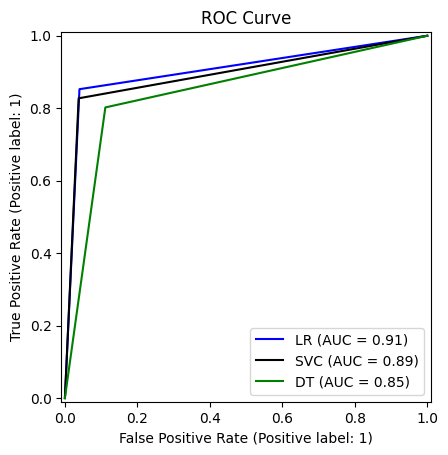

In [ ]:
fig, ax = plt.subplots()
plt.title("ROC Curve")
RocCurveDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LR", color='blue')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='black')
RocCurveDisplay.from_predictions(y_test, y_pred_dt, ax = ax, name = "DT", color='Green')

# Real-time prediction

In [ ]:
# Function to input new data and predict dropout status using the trained Decision Tree model
def predict_dropout():
    # List of feature names (first 34 columns)
    feature_names = df.columns[:34]
    print("Please enter the following values for prediction:")
    user_input = []
    for feature in feature_names:
        val = input(f"{feature}: ")
        # Try to convert to float, else int
        try:
            val = float(val)
            if val.is_integer():
                val = int(val)
        except ValueError:
            pass
        user_input.append(val)
    # Convert to numpy array and reshape
    user_array = np.array(user_input).reshape(1, -1)
    # Standardize using the same scaler as before
    user_array_scaled = StandardScaler().fit(df.iloc[:, :34].values).transform(user_array)
    # Predict
    pred = model_dt.predict(user_array_scaled)
    print("Prediction: Dropout" if pred[0] == 1 else "Prediction: Non-Dropout")

# Call the function to allow user input and prediction
predict_dropout()